In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def linear_regression(x_train, y_train):
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)
    
    x_transpose = np.transpose(x_train)
    x_transpose_dot_x = np.dot(x_transpose, x_train)
    x_transpose_dot_y = np.dot(x_transpose, y_train)
    theta = np.dot(np.linalg.inv(x_transpose_dot_x), x_transpose_dot_y)
    
    y_pred = np.dot(x_train, theta)
    
    return theta, y_pred

mse to calculate the Mean Squared Error and r2_score to calculate the R-squared (coefficient of determination) value. These functions take the true output (y_true) and the predicted output (y_pred) as inputs and calculate the respective metrics.

In [19]:

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [20]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

Load the dataset using pandas and perform data preprocessing 

* Convert 'smoker' column to numeric
* Convert 'region' column to numeric
* Seperate the features and the output variable
* Visualize the relationship between the features and the output variable 

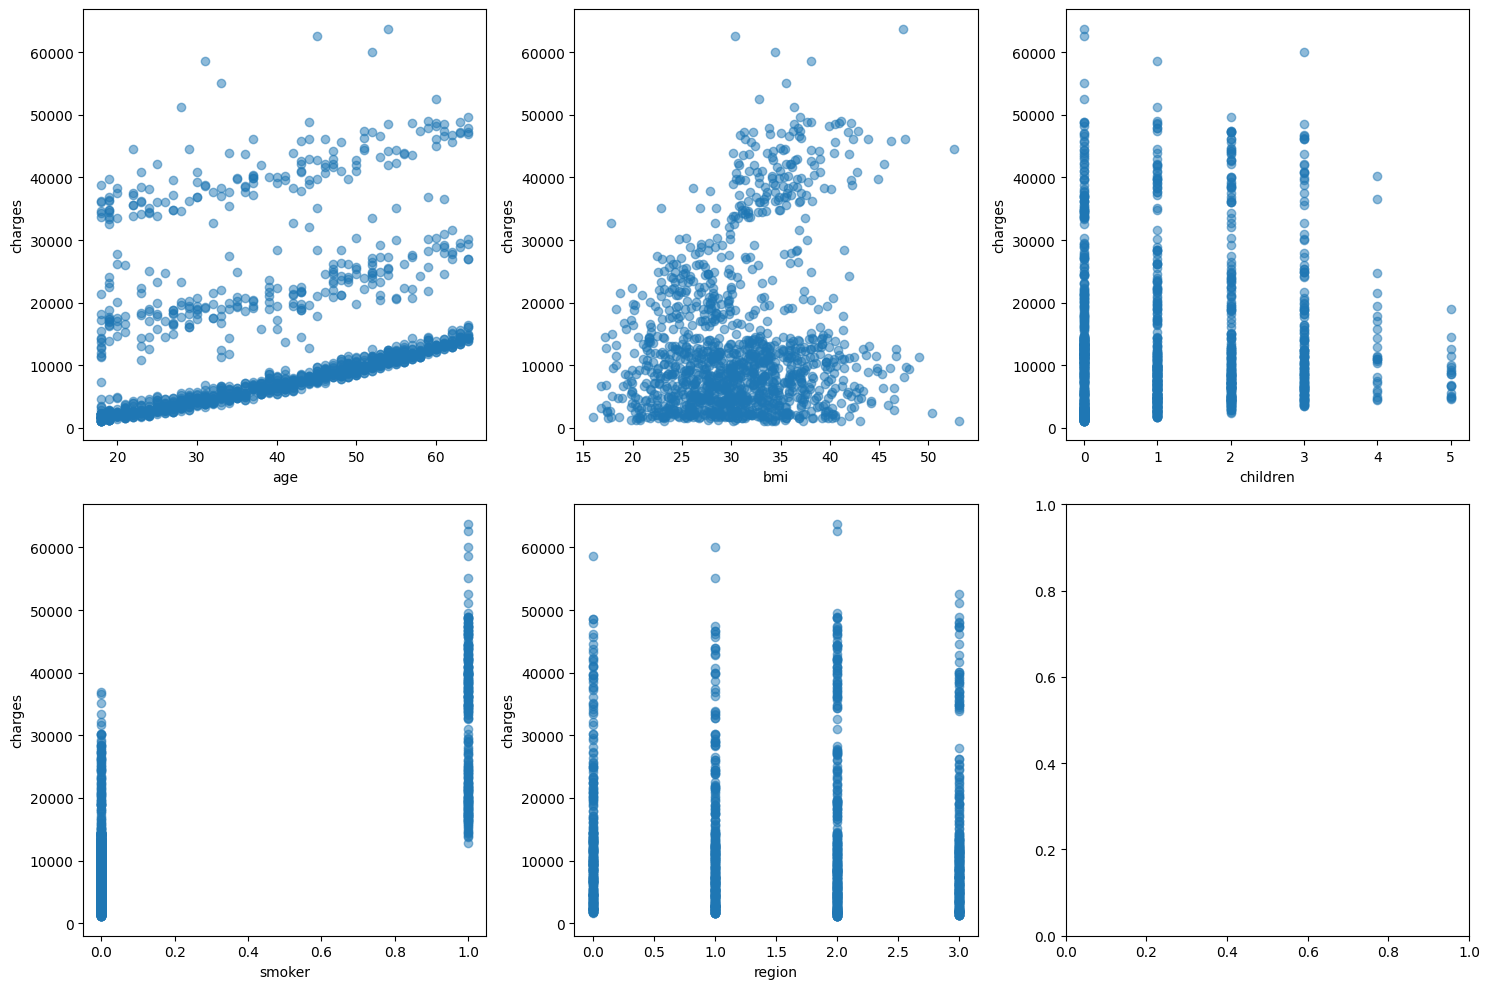

In [21]:
# Loading the dataset using pandas
data = pd.read_csv('Medical Price Dataset.csv')

# Performing data preprocessing
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})  # Converting 'smoker' column to numeric
data['region'] = data['region'].astype('category').cat.codes  # Converting 'region' column to numeric

# Separating the features and the output variable
x_train = data[['age', 'bmi', 'children', 'smoker', 'region']].astype(float)
y_train = data['charges'].astype(float)

# Visualizing the relationship between the features and the output variable
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, feature in enumerate(x_train.columns):
    axs[i].scatter(x_train[feature], y_train, alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('charges')

plt.tight_layout()
plt.show()

Call the linerar_regression function and calculate and print the evaluation metrics (MSE and R-squared).
These metrics provide insights into the accuracy and goodness of fit of the linear regression model.
By including these evaluation metrics, we can assess the performance of the Linear Regression model on the given dataset.
Finally plot the predicted output.

Mean Squared Error (MSE): 36531919.05296485
R-squared (coefficient of determination): 0.7507081384697805


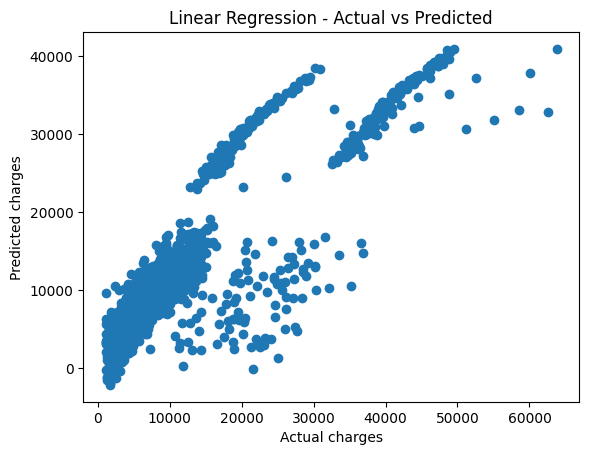

In [22]:
# Call the linear_regression function
theta, y_pred = linear_regression(x_train, y_train)

# Calculate evaluation metrics
mse_value = mse(y_train, y_pred)
r2_value = r2_score(y_train, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse_value)
print("R-squared (coefficient of determination):", r2_value)


# Plot the predicted output
plt.scatter(y_train, y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()